<a href="https://colab.research.google.com/github/leadbreak/spark/blob/main/study/Spark_Study_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! mkdir -p data

In [ ]:
! wget https://archive.ics.uci.edu/ml/machine-learning-databases/20newsgroups-mld/mini_newsgroups.tar.gz

--2021-09-08 06:01:35--  https://archive.ics.uci.edu/ml/machine-learning-databases/20newsgroups-mld/mini_newsgroups.tar.gz
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1860687 (1.8M) [application/x-httpd-php]
Saving to: ‘mini_newsgroups.tar.gz’

mini_newsgroups.tar 100%[===================>]   1.77M  4.96MB/s    in 0.4s    

2021-09-08 06:01:36 (4.96 MB/s) - ‘mini_newsgroups.tar.gz’ saved [1860687/1860687]



In [ ]:
! tar xzf mini_newsgroups.tar.gz -C ./data/

In [ ]:
! ls ./data/mini_newsgroups/

alt.atheism		  rec.autos	      sci.space
comp.graphics		  rec.motorcycles     soc.religion.christian
comp.os.ms-windows.misc   rec.sport.baseball  talk.politics.guns
comp.sys.ibm.pc.hardware  rec.sport.hockey    talk.politics.mideast
comp.sys.mac.hardware	  sci.crypt	      talk.politics.misc
comp.windows.x		  sci.electronics     talk.religion.misc
misc.forsale		  sci.med


In [ ]:
! wget https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

--2021-09-08 06:43:24--  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4551 (4.4K) [application/x-httpd-php]
Saving to: ‘iris.data’

iris.data           100%[===================>]   4.44K  --.-KB/s    in 0s      

2021-09-08 06:43:25 (124 MB/s) - ‘iris.data’ saved [4551/4551]



In [ ]:
! mv iris.data ./data

In [ ]:
! wget https://github.com/alexander-n-thomas/spark-nlp-book-prod/raw/master/en_lemmas.txt

--2021-09-08 06:43:35--  https://github.com/alexander-n-thomas/spark-nlp-book-prod/raw/master/en_lemmas.txt
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/alexander-n-thomas/spark-nlp-book/raw/master/en_lemmas.txt [following]
--2021-09-08 06:43:35--  https://github.com/alexander-n-thomas/spark-nlp-book/raw/master/en_lemmas.txt
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/alexander-n-thomas/spark-nlp-book/master/en_lemmas.txt [following]
--2021-09-08 06:43:36--  https://raw.githubusercontent.com/alexander-n-thomas/spark-nlp-book/master/en_lemmas.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.

# STEP 01. install & import libraries


In [ ]:
import os

# Install java
! apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]
! java -version

# Install pyspark
! pip install --ignore-installed pyspark==2.4.4

# Install Spark NLP
! pip install --ignore-installed spark-nlp==2.5.1

openjdk version "1.8.0_292"
OpenJDK Runtime Environment (build 1.8.0_292-8u292-b10-0ubuntu1~18.04-b10)
OpenJDK 64-Bit Server VM (build 25.292-b10, mixed mode)
     |████████████████████████████████| 215.7 MB 62 kB/s 
     |████████████████████████████████| 197 kB 18.4 MB/s 
  Created wheel for pyspark: filename=pyspark-2.4.4-py2.py3-none-any.whl size=216130392 sha256=9fcec86889222e212c3f75ce1448882e5d9741d9ca318de7cafe0d8c4b29f8ae
  Stored in directory: /root/.cache/pip/wheels/11/48/19/c3b6b66e4575c164407a83bc065179904ddc33c9d6500846f0
Successfully built pyspark
     |████████████████████████████████| 121 kB 5.2 MB/s 


In [ ]:
import sparknlp

import pyspark
from pyspark import SparkConf
from pyspark.sql import SparkSession
from pyspark.sql import functions as fun
from pyspark.sql.types import *

%matplotlib inline
import matplotlib.pyplot as plt

# STEP 02. Start Spark Session


In [ ]:
packages = ','.join([
    "com.johnsnowlabs.nlp:spark-nlp_2.11:2.5.1",
])

spark_conf = SparkConf()
spark_conf = spark_conf.setAppName('spark-nlp-book-p1c1')
spark_conf = spark_conf.setAppName('master[*]')
spark_conf = spark_conf.set("spark.jars.packages", packages)

spark = SparkSession.builder.config(conf=spark_conf).getOrCreate()

# STEP 03. Loading & Viewing data in Apache Spark


In [ ]:
mini_newsgroups_path = os.path.join('data', 'mini_newsgroups', '*')
mini_newsgroups_path

'data/mini_newsgroups/*'

In [ ]:
texts = spark.sparkContext.wholeTextFiles(mini_newsgroups_path)
texts

org.apache.spark.api.java.JavaPairRDD@508a6d47

In [ ]:
schema = StructType([
    StructField('filename', StringType()),
    StructField('text', StringType()),
])
texts_df = spark.createDataFrame(texts, schema)
texts_df.show()

+--------------------+--------------------+
|            filename|                text|
+--------------------+--------------------+
|file:/content/dat...|Path: cantaloupe....|
|file:/content/dat...|Xref: cantaloupe....|
|file:/content/dat...|Path: cantaloupe....|
|file:/content/dat...|Newsgroups: sci.e...|
|file:/content/dat...|Xref: cantaloupe....|
|file:/content/dat...|Newsgroups: sci.e...|
|file:/content/dat...|Xref: cantaloupe....|
|file:/content/dat...|Path: cantaloupe....|
|file:/content/dat...|Newsgroups: sci.e...|
|file:/content/dat...|Newsgroups: sci.e...|
|file:/content/dat...|Newsgroups: sci.e...|
|file:/content/dat...|Newsgroups: sci.e...|
|file:/content/dat...|Path: cantaloupe....|
|file:/content/dat...|Path: cantaloupe....|
|file:/content/dat...|Newsgroups: sci.e...|
|file:/content/dat...|Path: cantaloupe....|
|file:/content/dat...|Path: cantaloupe....|
|file:/content/dat...|Path: cantaloupe....|
|file:/content/dat...|Xref: cantaloupe....|
|file:/content/dat...|Xref: cant

In [ ]:
texts_df.show(n=5, truncate=100, vertical=True)

-RECORD 0--------------------------------------------------------------------------------------------------------
 filename | file:/content/data/mini_newsgroups/sci.electronics/54041                                             
 text     | Path: cantaloupe.srv.cs.cmu.edu!das-news.harvard.edu!ogicse!uwm.edu!cs.utexas.edu!zaphod.mps.ohio... 
-RECORD 1--------------------------------------------------------------------------------------------------------
 filename | file:/content/data/mini_newsgroups/sci.electronics/53938                                             
 text     | Xref: cantaloupe.srv.cs.cmu.edu comp.robotics:5376 sci.electronics:53938
Newsgroups: comp.robotic... 
-RECORD 2--------------------------------------------------------------------------------------------------------
 filename | file:/content/data/mini_newsgroups/sci.electronics/53706                                             
 text     | Path: cantaloupe.srv.cs.cmu.edu!das-news.harvard.edu!noc.near.net!howland.re

In [ ]:
texts_df.limit(5).toPandas()

,filename,text
0,file:/content/data/mini_newsgroups/sci.electro...,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...
1,file:/content/data/mini_newsgroups/sci.electro...,Xref: cantaloupe.srv.cs.cmu.edu comp.robotics:...
2,file:/content/data/mini_newsgroups/sci.electro...,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...
3,file:/content/data/mini_newsgroups/sci.electro...,Newsgroups: sci.electronics\nPath: cantaloupe....
4,file:/content/data/mini_newsgroups/sci.electro...,Xref: cantaloupe.srv.cs.cmu.edu comp.os.msdos....


# STEP 04. Hello World with SparkNLP

In [ ]:
texts_df = texts_df.withColumn(
    'newsgroup', 
    fun.split('filename', '/').getItem(8)
)

texts_df.limit(5).toPandas()

,filename,text,newsgroup
0,file:/content/data/mini_newsgroups/sci.electro...,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,None
1,file:/content/data/mini_newsgroups/sci.electro...,Xref: cantaloupe.srv.cs.cmu.edu comp.robotics:...,None
2,file:/content/data/mini_newsgroups/sci.electro...,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,None
3,file:/content/data/mini_newsgroups/sci.electro...,Newsgroups: sci.electronics\nPath: cantaloupe....,None
4,file:/content/data/mini_newsgroups/sci.electro...,Xref: cantaloupe.srv.cs.cmu.edu comp.os.msdos....,None


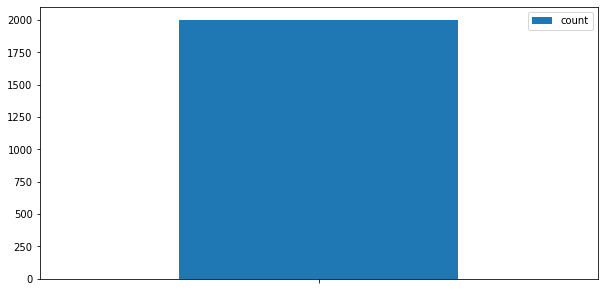

In [ ]:
newsgroup_counts = texts_df.groupBy('newsgroup').count().toPandas()

newsgroup_counts.plot(kind='bar', figsize=(10, 5))
plt.xticks(
    ticks=range(len(newsgroup_counts)), 
    labels=newsgroup_counts['newsgroup']
)
plt.show()

In [ ]:
from sparknlp.pretrained import PretrainedPipeline

"""
The explain_document_ml has one Transformer and four annotators

DocumentAssembler: a Transformer that creates a column that contains documents
Sentence Segmenter: an annotator that produces the sentences of the document
Tokenizer: an annotator that produces the tokens of the sentences
SpellChecker: an annotator that produces the spelling-corrected tokens
Stemmer: an annotator that produces the stems of the tokens
Lemmatizer: an annotator that produces the lemmas of the tokens.
POS Tagger: an annotator that produces the parts of speech of the associated tokens

"""

pipeline = PretrainedPipeline('explain_document_ml', lang='en')
pipeline

explain_document_ml download started this may take some time.
Approx size to download 9.4 MB
[OK!]


In [ ]:
pipeline.annotate('Hello wrold!')

{'document': ['Hello wrold!'],
 'lemmas': ['Hello', 'world', '!'],
 'pos': ['UH', 'NN', '.'],
 'sentence': ['Hello wrold!'],
 'spell': ['Hello', 'world', '!'],
 'stems': ['hello', 'world', '!'],
 'token': ['Hello', 'wrold', '!']}

In [ ]:
texts_df.printSchema()

root
 |-- filename: string (nullable = true)
 |-- text: string (nullable = true)
 |-- newsgroup: string (nullable = true)



In [ ]:
procd_texts_df = pipeline.annotate(texts_df, 'text')
procd_texts_df.printSchema()

root
 |-- filename: string (nullable = true)
 |-- text: string (nullable = true)
 |-- newsgroup: string (nullable = true)
 |-- document: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- annotatorType: string (nullable = true)
 |    |    |-- begin: integer (nullable = false)
 |    |    |-- end: integer (nullable = false)
 |    |    |-- result: string (nullable = true)
 |    |    |-- metadata: map (nullable = true)
 |    |    |    |-- key: string
 |    |    |    |-- value: string (valueContainsNull = true)
 |    |    |-- embeddings: array (nullable = true)
 |    |    |    |-- element: float (containsNull = false)
 |-- sentence: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- annotatorType: string (nullable = true)
 |    |    |-- begin: integer (nullable = false)
 |    |    |-- end: integer (nullable = false)
 |    |    |-- result: string (nullable = true)
 |    |    |-- metadata: map (nullable = true)
 |    |   

In [ ]:
procd_texts_df.show(n=2)

+--------------------+--------------------+---------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|            filename|                text|newsgroup|            document|            sentence|               token|               spell|              lemmas|               stems|                 pos|
+--------------------+--------------------+---------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|file:/content/dat...|Path: cantaloupe....|     null|[[document, 0, 16...|[[document, 0, 24...|[[token, 0, 3, Pa...|[[token, 0, 3, Pa...|[[token, 0, 3, Pa...|[[token, 0, 3, pa...|[[pos, 0, 3, NNP,...|
|file:/content/dat...|Xref: cantaloupe....|     null|[[document, 0, 27...|[[document, 0, 86...|[[token, 0, 3, Xr...|[[token, 0, 3, xr...|[[token, 0, 3, xr...|[[token, 0, 3, xr...|[[pos, 0, 3, NN, 

In [ ]:
procd_texts_df.show(n=2, truncate=100, vertical=True)

-RECORD 0---------------------------------------------------------------------------------------------------------
 filename  | file:/content/data/mini_newsgroups/sci.electronics/54041                                             
 text      | Path: cantaloupe.srv.cs.cmu.edu!das-news.harvard.edu!ogicse!uwm.edu!cs.utexas.edu!zaphod.mps.ohio... 
 newsgroup | null                                                                                                 
 document  | [[document, 0, 1697, Path: cantaloupe.srv.cs.cmu.edu!das-news.harvard.edu!ogicse!uwm.edu!cs.utexa... 
 sentence  | [[document, 0, 244, Path: cantaloupe.srv.cs.cmu.edu!das-news.harvard.edu!ogicse!uwm.edu!cs.utexas... 
 token     | [[token, 0, 3, Path, [sentence -> 0], []], [token, 4, 4, :, [sentence -> 0], []], [token, 6, 132,... 
 spell     | [[token, 0, 3, Path, [confidence -> 1.0, sentence -> 0], []], [token, 4, 4, :, [confidence -> 0.0... 
 lemmas    | [[token, 0, 3, Path, [confidence -> 1.0, sentence -> 0], []], [toke

In [ ]:
from sparknlp import Finisher

finisher = Finisher()
finisher = finisher

# taking the lemma column
finisher = finisher.setInputCols(['lemmas'])

# seperating lemmas by a single space
finisher = finisher.setAnnotationSplitSymbol(' ')
finished_texts_df = finisher.transform(procd_texts_df)
finished_texts_df.show(n=1, truncate=100, vertical=True)

-RECORD 0---------------------------------------------------------------------------------------------------------------
 filename        | file:/content/data/mini_newsgroups/sci.electronics/54041                                             
 text            | Path: cantaloupe.srv.cs.cmu.edu!das-news.harvard.edu!ogicse!uwm.edu!cs.utexas.edu!zaphod.mps.ohio... 
 newsgroup       | null                                                                                                 
 finished_lemmas | [Path, :, cantaloupe.srv.cs.cmu.edu!das-news.harvard.edu!ogicse!uwm.edu!cs.utexas.edu!zaphod.mps.... 
only showing top 1 row



# STEP 05. SparkNLP Tutorial

In [ ]:
from operator import concat, itemgetter, methodcaller
import os
from time import sleep

import pyspark
from pyspark import SparkConf
from pyspark.sql import SparkSession
from pyspark.sql import functions as fun
from pyspark.sql.types import *

In [ ]:
packages = ','.join([
    "com.johnsnowlabs.nlp:spark-nlp_2.11:2.4.5",
])

spark = SparkSession.builder \
    .master("local[*]") \
    .appName("spark-nlp-book-p1c3") \
    .config("spark.jars.packages", packages)\
    .getOrCreate()

In [ ]:
def has_moon(text):
    if 'moon' in text:
        sleep(1)
        return True
    else:
        return False

In [ ]:
# RDD containing filepath-text pairs
path = os.path.join('data', 'mini_newsgroups', 'sci.space')
text_pairs = spark.sparkContext\
    .wholeTextFiles(path) 
texts = text_pairs.map(itemgetter(1))
lower_cased = texts.map(methodcaller('lower'))
moon_texts = texts.filter(has_moon).persist()
print('This appears quickly because the previous operations are '
      'all lazy')
print(moon_texts.count())
print('This appears slowly since the count method will call '
      'has_moon which sleeps')
print(moon_texts.reduce(concat)[:100])
print('This appears quickly because has_moon will not be '
      'called due to the data being persisted')

This appears quickly because the previous operations are all lazy
11
This appears slowly since the count method will call has_moon which sleeps
Xref: cantaloupe.srv.cs.cmu.edu sci.space:60944 sci.astro:34770 alt.sci.planetary:1193
Path: cantalo
This appears quickly because has_moon will not be called due to the data being persisted


In [ ]:
from collections import Counter
from operator import add

from nltk.tokenize import RegexpTokenizer

In [ ]:
# RDD containing filepath-text pairs
texts = spark.sparkContext.wholeTextFiles(path) 
print('\n\nfilepath-text pair of first document')
print(texts.first())



filepath-text pair of first document
('file:/content/data/mini_newsgroups/sci.space/61440', "Newsgroups: sci.space\nPath: cantaloupe.srv.cs.cmu.edu!das-news.harvard.edu!noc.near.net!howland.reston.ans.net!zaphod.mps.ohio-state.edu!saimiri.primate.wisc.edu!usenet.coe.montana.edu!netnews.nwnet.net!news.u.washington.edu!raven.alaska.edu!aurora.alaska.edu!nsmca\nFrom: nsmca@aurora.alaska.edu\nSubject: Re: Space Manuevering Tug (was HST servicing mission_)\nMessage-ID: <1993Apr29.234119.1@aurora.alaska.edu>\nLines: 39\nSender: news@raven.alaska.edu (USENET News System)\nNntp-Posting-Host: acad3.alaska.edu\nOrganization: University of Alaska Fairbanks\nReferences: <1rnaih$jvj@access.digex.net>\nDate: Fri, 30 Apr 1993 07:41:19 GMT\n\nIn article <1rnaih$jvj@access.digex.net>, prb@access.digex.net (Pat) writes:\n> \n> Given that what i described for the HST  seemed to be the SMT,   and given\n> the mass amrgins on the discovery mission  is tight enough that  spacewalking\n> has to be carefull

In [ ]:
tokenizer = RegexpTokenizer(r'\w+', gaps=False)
tokenized_texts = texts.map(
    lambda path_text: tokenizer.tokenize(path_text[1]))
print('\n\ntokenized text of first document')
print(tokenized_texts.first())



tokenized text of first document
['Newsgroups', 'sci', 'space', 'Path', 'cantaloupe', 'srv', 'cs', 'cmu', 'edu', 'das', 'news', 'harvard', 'edu', 'noc', 'near', 'net', 'howland', 'reston', 'ans', 'net', 'zaphod', 'mps', 'ohio', 'state', 'edu', 'saimiri', 'primate', 'wisc', 'edu', 'usenet', 'coe', 'montana', 'edu', 'netnews', 'nwnet', 'net', 'news', 'u', 'washington', 'edu', 'raven', 'alaska', 'edu', 'aurora', 'alaska', 'edu', 'nsmca', 'From', 'nsmca', 'aurora', 'alaska', 'edu', 'Subject', 'Re', 'Space', 'Manuevering', 'Tug', 'was', 'HST', 'servicing', 'mission_', 'Message', 'ID', '1993Apr29', '234119', '1', 'aurora', 'alaska', 'edu', 'Lines', '39', 'Sender', 'news', 'raven', 'alaska', 'edu', 'USENET', 'News', 'System', 'Nntp', 'Posting', 'Host', 'acad3', 'alaska', 'edu', 'Organization', 'University', 'of', 'Alaska', 'Fairbanks', 'References', '1rnaih', 'jvj', 'access', 'digex', 'net', 'Date', 'Fri', '30', 'Apr', '1993', '07', '41', '19', 'GMT', 'In', 'article', '1rnaih', 'jvj', 'acce

In [ ]:
# This is the equivalent place that the previous implementations 
# started
document_token_counts = tokenized_texts.map(Counter)
print('\n\ndocument-level counts of first document')
print(document_token_counts.first().most_common(10))



document-level counts of first document
[('edu', 13), ('the', 8), ('alaska', 7), ('to', 7), ('a', 7), ('net', 6), ('of', 5), ('HST', 4), ('not', 4), ('Use', 4)]


In [ ]:
word_counts = token_counts = document_token_counts.reduce(add)
print('\n\nword counts')
print(word_counts.most_common(10))



word counts
[('the', 1648), ('of', 804), ('edu', 784), ('to', 770), ('and', 641), ('a', 615), ('in', 402), ('is', 352), ('for', 305), ('cmu', 288)]


In [ ]:
from sparknlp import DocumentAssembler, Finisher

In [ ]:
# RDD containing filepath-text pairs
texts = spark.sparkContext.wholeTextFiles(path)

schema = StructType([
    StructField('path', StringType()),
    StructField('text', StringType()),
])

texts = spark.createDataFrame(texts, schema=schema)

In [ ]:
texts.limit(5).toPandas()

,path,text
0,file:/content/data/mini_newsgroups/sci.space/6...,Newsgroups: sci.space\nPath: cantaloupe.srv.cs...
1,file:/content/data/mini_newsgroups/sci.space/6...,Xref: cantaloupe.srv.cs.cmu.edu sci.astro:3513...
2,file:/content/data/mini_newsgroups/sci.space/6...,Xref: cantaloupe.srv.cs.cmu.edu sci.environmen...
3,file:/content/data/mini_newsgroups/sci.space/6...,Newsgroups: sci.space\nPath: cantaloupe.srv.cs...
4,file:/content/data/mini_newsgroups/sci.space/6...,Xref: cantaloupe.srv.cs.cmu.edu sci.environmen...


In [ ]:
"""
DocumentAssembler
The DocumentAssembler takes five parameters (see table0314):

inputCol
The column containing the text of the document
outputCol
The name of the column containing the newly constructed document
idCol
The name of the column containing the identifier (optional)
metadataCol
The name of a Map-type column that represents document metadata (optional)
trimAndClearNewLines
Determines whether to remove new line characters and trim strings (optional, default = True)
"""

document_assembler = DocumentAssembler()\
    .setInputCol('text')\
    .setOutputCol('document')\
    .setIdCol('path')

docs = document_assembler.transform(texts)

docs.limit(5).toPandas()

,path,text,document
0,file:/content/data/mini_newsgroups/sci.space/6...,Newsgroups: sci.space\nPath: cantaloupe.srv.cs...,"[(document, 0, 1834, Newsgroups: sci.space\nPa..."
1,file:/content/data/mini_newsgroups/sci.space/6...,Xref: cantaloupe.srv.cs.cmu.edu sci.astro:3513...,"[(document, 0, 1367, Xref: cantaloupe.srv.cs.c..."
2,file:/content/data/mini_newsgroups/sci.space/6...,Xref: cantaloupe.srv.cs.cmu.edu sci.environmen...,"[(document, 0, 823, Xref: cantaloupe.srv.cs.cm..."
3,file:/content/data/mini_newsgroups/sci.space/6...,Newsgroups: sci.space\nPath: cantaloupe.srv.cs...,"[(document, 0, 1693, Newsgroups: sci.space\nPa..."
4,file:/content/data/mini_newsgroups/sci.space/6...,Xref: cantaloupe.srv.cs.cmu.edu sci.environmen...,"[(document, 0, 1537, Xref: cantaloupe.srv.cs.c..."


In [ ]:
docs.first()['document'][0].asDict()

{'annotatorType': 'document',
 'begin': 0,
 'embeddings': [],
 'end': 1834,
 'metadata': {'id': 'file:/content/data/mini_newsgroups/sci.space/61440',
  'sentence': '0'},
 'result': "Newsgroups: sci.space\nPath: cantaloupe.srv.cs.cmu.edu!das-news.harvard.edu!noc.near.net!howland.reston.ans.net!zaphod.mps.ohio-state.edu!saimiri.primate.wisc.edu!usenet.coe.montana.edu!netnews.nwnet.net!news.u.washington.edu!raven.alaska.edu!aurora.alaska.edu!nsmca\nFrom: nsmca@aurora.alaska.edu\nSubject: Re: Space Manuevering Tug (was HST servicing mission_)\nMessage-ID: <1993Apr29.234119.1@aurora.alaska.edu>\nLines: 39\nSender: news@raven.alaska.edu (USENET News System)\nNntp-Posting-Host: acad3.alaska.edu\nOrganization: University of Alaska Fairbanks\nReferences: <1rnaih$jvj@access.digex.net>\nDate: Fri, 30 Apr 1993 07:41:19 GMT\n\nIn article <1rnaih$jvj@access.digex.net>, prb@access.digex.net (Pat) writes:\n> \n> Given that what i described for the HST  seemed to be the SMT,   and given\n> the mass amr

In [ ]:
from sparknlp.annotator import SentenceDetector

"""
SentenceDetector
The SentenceDetector uses a rule-based algorithm inspired by Kevin Dias's Ruby implementation. It takes the following parameters

inputCols
A list of columns to sentence-tokenize.
outputCol
The name of the new sentence column.
useAbbrevations
Determines whether to apply abbreviations at sentence detection.
useCustomBoundsOnly
Determines whether to only utilize custom bounds for sentence detection.
explodeSentences
Determines whether to explode each sentence into a different row, for better parallelization. Defaults to false.
customBounds
Characters used to explicitly mark sentence bounds.
"""

sent_detector = SentenceDetector()\
    .setInputCols(['document'])\
    .setOutputCol('sentences')

sentences = sent_detector.transform(docs)
sentences.limit(5).toPandas()

,path,text,document,sentences
0,file:/content/data/mini_newsgroups/sci.space/6...,Newsgroups: sci.space\nPath: cantaloupe.srv.cs...,"[(document, 0, 1834, Newsgroups: sci.space\nPa...","[(document, 0, 207, Newsgroups: sci.space\nPat..."
1,file:/content/data/mini_newsgroups/sci.space/6...,Xref: cantaloupe.srv.cs.cmu.edu sci.astro:3513...,"[(document, 0, 1367, Xref: cantaloupe.srv.cs.c...","[(document, 0, 212, Xref: cantaloupe.srv.cs.cm..."
2,file:/content/data/mini_newsgroups/sci.space/6...,Xref: cantaloupe.srv.cs.cmu.edu sci.environmen...,"[(document, 0, 823, Xref: cantaloupe.srv.cs.cm...","[(document, 0, 561, Xref: cantaloupe.srv.cs.cm..."
3,file:/content/data/mini_newsgroups/sci.space/6...,Newsgroups: sci.space\nPath: cantaloupe.srv.cs...,"[(document, 0, 1693, Newsgroups: sci.space\nPa...","[(document, 0, 917, Newsgroups: sci.space\nPat..."
4,file:/content/data/mini_newsgroups/sci.space/6...,Xref: cantaloupe.srv.cs.cmu.edu sci.environmen...,"[(document, 0, 1537, Xref: cantaloupe.srv.cs.c...","[(document, 0, 666, Xref: cantaloupe.srv.cs.cm..."


In [ ]:
from sparknlp.annotator import Tokenizer

"""
Tokenizer
A Tokenizer is a fundamental Annotator. Almost all text-based data processing begins with some form of tokenization. Most classical NLP algorithms expect tokens as the basic input. Many deep learning algorithms are being developed that take characters as basic input. Most NLP applications still use tokenization. The Spark NLP Tokenizer is a little more sophisticated than just a regular expression-based tokenizer. It has a number of parameters. The following are some of the basic ones (see table0316 for the results):

inputCols
A list of columns to tokenize.
outputCol
The name of the new token column.
targetPattern
Basic regex rule to identify a candidate for tokenization. Defaults to \S+ which means anything not a space (optional).
prefixPattern
Regular expression (regex) to identify subtokens that come in the beginning of the token. Regex has to start with \A and must contain groups (). Each group will become a separate token within the prefix. Defaults to nonletter characters—for example, quotes or parentheses (optional).
suffixPattern
Regex to identify subtokens that are in the end of the token. Regex has to end with \z and must contain groups (). Each group will become a separate token within the prefix. Defaults to nonletter characters—for example, quotes or parentheses (optional).
"""

tokenizer = Tokenizer()\
    .setInputCols(['sentences'])\
    .setOutputCol('tokens')\
    .fit(sentences)

tokens = tokenizer.transform(sentences)
tokens.limit(5).toPandas()

,path,text,document,sentences,tokens
0,file:/content/data/mini_newsgroups/sci.space/6...,Newsgroups: sci.space\nPath: cantaloupe.srv.cs...,"[(document, 0, 1834, Newsgroups: sci.space\nPa...","[(document, 0, 207, Newsgroups: sci.space\nPat...","[(token, 0, 9, Newsgroups, {'sentence': '0'}, ..."
1,file:/content/data/mini_newsgroups/sci.space/6...,Xref: cantaloupe.srv.cs.cmu.edu sci.astro:3513...,"[(document, 0, 1367, Xref: cantaloupe.srv.cs.c...","[(document, 0, 212, Xref: cantaloupe.srv.cs.cm...","[(token, 0, 3, Xref, {'sentence': '0'}, []), (..."
2,file:/content/data/mini_newsgroups/sci.space/6...,Xref: cantaloupe.srv.cs.cmu.edu sci.environmen...,"[(document, 0, 823, Xref: cantaloupe.srv.cs.cm...","[(document, 0, 561, Xref: cantaloupe.srv.cs.cm...","[(token, 0, 3, Xref, {'sentence': '0'}, []), (..."
3,file:/content/data/mini_newsgroups/sci.space/6...,Newsgroups: sci.space\nPath: cantaloupe.srv.cs...,"[(document, 0, 1693, Newsgroups: sci.space\nPa...","[(document, 0, 917, Newsgroups: sci.space\nPat...","[(token, 0, 9, Newsgroups, {'sentence': '0'}, ..."
4,file:/content/data/mini_newsgroups/sci.space/6...,Xref: cantaloupe.srv.cs.cmu.edu sci.environmen...,"[(document, 0, 1537, Xref: cantaloupe.srv.cs.c...","[(document, 0, 666, Xref: cantaloupe.srv.cs.cm...","[(token, 0, 3, Xref, {'sentence': '0'}, []), (..."


In [ ]:
from sparknlp.annotator import Lemmatizer

"""
Lemmatizer
The lemmatizer finds the lemmas for the tokens. Lemmas are the entry words in dictionaries. For example, "cats" lemmatizes to "cat," and "oxen" lemmatizes to "ox." Loading the lemmatizer requires a dictionary and the following three parameters:

inputCols
A list of columns to tokenize
outputCol
The name of the new token column
dictionary
The resource to be loaded as the lemma dictionary
"""

lemmatizer = Lemmatizer() \
  .setInputCols(["tokens"]) \
  .setOutputCol("lemma") \
  .setDictionary('en_lemmas.txt', '\t', ',')\
  .fit(tokens)

lemmas = lemmatizer.transform(tokens)
lemmas.limit(5).toPandas()

,path,text,document,sentences,tokens,lemma
0,file:/content/data/mini_newsgroups/sci.space/6...,Newsgroups: sci.space\nPath: cantaloupe.srv.cs...,"[(document, 0, 1834, Newsgroups: sci.space\nPa...","[(document, 0, 207, Newsgroups: sci.space\nPat...","[(token, 0, 9, Newsgroups, {'sentence': '0'}, ...","[(token, 0, 9, Newsgroups, {'sentence': '0'}, ..."
1,file:/content/data/mini_newsgroups/sci.space/6...,Xref: cantaloupe.srv.cs.cmu.edu sci.astro:3513...,"[(document, 0, 1367, Xref: cantaloupe.srv.cs.c...","[(document, 0, 212, Xref: cantaloupe.srv.cs.cm...","[(token, 0, 3, Xref, {'sentence': '0'}, []), (...","[(token, 0, 3, Xref, {'sentence': '0'}, []), (..."
2,file:/content/data/mini_newsgroups/sci.space/6...,Xref: cantaloupe.srv.cs.cmu.edu sci.environmen...,"[(document, 0, 823, Xref: cantaloupe.srv.cs.cm...","[(document, 0, 561, Xref: cantaloupe.srv.cs.cm...","[(token, 0, 3, Xref, {'sentence': '0'}, []), (...","[(token, 0, 3, Xref, {'sentence': '0'}, []), (..."
3,file:/content/data/mini_newsgroups/sci.space/6...,Newsgroups: sci.space\nPath: cantaloupe.srv.cs...,"[(document, 0, 1693, Newsgroups: sci.space\nPa...","[(document, 0, 917, Newsgroups: sci.space\nPat...","[(token, 0, 9, Newsgroups, {'sentence': '0'}, ...","[(token, 0, 9, Newsgroups, {'sentence': '0'}, ..."
4,file:/content/data/mini_newsgroups/sci.space/6...,Xref: cantaloupe.srv.cs.cmu.edu sci.environmen...,"[(document, 0, 1537, Xref: cantaloupe.srv.cs.c...","[(document, 0, 666, Xref: cantaloupe.srv.cs.cm...","[(token, 0, 3, Xref, {'sentence': '0'}, []), (...","[(token, 0, 3, Xref, {'sentence': '0'}, []), (..."


In [ ]:
from sparknlp.annotator import PerceptronModel

pos_tagger = PerceptronModel.pretrained() \
  .setInputCols(["tokens", "sentences"]) \
  .setOutputCol("pos")

postags = pos_tagger.transform(lemmas)
postags.limit(5).toPandas()

pos_anc download started this may take some time.
Approximate size to download 4.3 MB
[OK!]


,path,text,document,sentences,tokens,lemma,pos
0,file:/content/data/mini_newsgroups/sci.space/6...,Newsgroups: sci.space\nPath: cantaloupe.srv.cs...,"[(document, 0, 1834, Newsgroups: sci.space\nPa...","[(document, 0, 207, Newsgroups: sci.space\nPat...","[(token, 0, 9, Newsgroups, {'sentence': '0'}, ...","[(token, 0, 9, Newsgroups, {'sentence': '0'}, ...","[(pos, 0, 9, NNP, {'word': 'Newsgroups'}, []),..."
1,file:/content/data/mini_newsgroups/sci.space/6...,Xref: cantaloupe.srv.cs.cmu.edu sci.astro:3513...,"[(document, 0, 1367, Xref: cantaloupe.srv.cs.c...","[(document, 0, 212, Xref: cantaloupe.srv.cs.cm...","[(token, 0, 3, Xref, {'sentence': '0'}, []), (...","[(token, 0, 3, Xref, {'sentence': '0'}, []), (...","[(pos, 0, 3, NNP, {'word': 'Xref'}, []), (pos,..."
2,file:/content/data/mini_newsgroups/sci.space/6...,Xref: cantaloupe.srv.cs.cmu.edu sci.environmen...,"[(document, 0, 823, Xref: cantaloupe.srv.cs.cm...","[(document, 0, 561, Xref: cantaloupe.srv.cs.cm...","[(token, 0, 3, Xref, {'sentence': '0'}, []), (...","[(token, 0, 3, Xref, {'sentence': '0'}, []), (...","[(pos, 0, 3, NNP, {'word': 'Xref'}, []), (pos,..."
3,file:/content/data/mini_newsgroups/sci.space/6...,Newsgroups: sci.space\nPath: cantaloupe.srv.cs...,"[(document, 0, 1693, Newsgroups: sci.space\nPa...","[(document, 0, 917, Newsgroups: sci.space\nPat...","[(token, 0, 9, Newsgroups, {'sentence': '0'}, ...","[(token, 0, 9, Newsgroups, {'sentence': '0'}, ...","[(pos, 0, 9, NNP, {'word': 'Newsgroups'}, []),..."
4,file:/content/data/mini_newsgroups/sci.space/6...,Xref: cantaloupe.srv.cs.cmu.edu sci.environmen...,"[(document, 0, 1537, Xref: cantaloupe.srv.cs.c...","[(document, 0, 666, Xref: cantaloupe.srv.cs.cm...","[(token, 0, 3, Xref, {'sentence': '0'}, []), (...","[(token, 0, 3, Xref, {'sentence': '0'}, []), (...","[(pos, 0, 3, NNP, {'word': 'Xref'}, []), (pos,..."


In [ ]:
from sparknlp.pretrained import PretrainedPipeline

pipeline = PretrainedPipeline('explain_document_ml', lang='en')

pipeline.transform(texts).limit(5).toPandas()

explain_document_ml download started this may take some time.
Approx size to download 9.4 MB
[OK!]


,path,text,document,sentence,token,spell,lemmas,stems,pos
0,file:/content/data/mini_newsgroups/sci.space/6...,Newsgroups: sci.space\nPath: cantaloupe.srv.cs...,"[(document, 0, 1834, Newsgroups: sci.space\nPa...","[(document, 0, 207, Newsgroups: sci.space\nPat...","[(token, 0, 9, Newsgroups, {'sentence': '0'}, ...","[(token, 0, 9, Newsgroups, {'sentence': '0', '...","[(token, 0, 9, Newsgroups, {'sentence': '0', '...","[(token, 0, 9, newsgroup, {'sentence': '0', 'c...","[(pos, 0, 9, NNP, {'word': 'Newsgroups'}, []),..."
1,file:/content/data/mini_newsgroups/sci.space/6...,Xref: cantaloupe.srv.cs.cmu.edu sci.astro:3513...,"[(document, 0, 1367, Xref: cantaloupe.srv.cs.c...","[(document, 0, 212, Xref: cantaloupe.srv.cs.cm...","[(token, 0, 3, Xref, {'sentence': '0'}, []), (...","[(token, 0, 3, xref, {'sentence': '0', 'confid...","[(token, 0, 3, tref, {'sentence': '0', 'confid...","[(token, 0, 3, pref, {'sentence': '0', 'confid...","[(pos, 0, 3, NN, {'word': 'pref'}, []), (pos, ..."
2,file:/content/data/mini_newsgroups/sci.space/6...,Xref: cantaloupe.srv.cs.cmu.edu sci.environmen...,"[(document, 0, 823, Xref: cantaloupe.srv.cs.cm...","[(document, 0, 561, Xref: cantaloupe.srv.cs.cm...","[(token, 0, 3, Xref, {'sentence': '0'}, []), (...","[(token, 0, 3, pref, {'sentence': '0', 'confid...","[(token, 0, 3, xref, {'sentence': '0', 'confid...","[(token, 0, 3, tref, {'sentence': '0', 'confid...","[(pos, 0, 3, NN, {'word': 'pref'}, []), (pos, ..."
3,file:/content/data/mini_newsgroups/sci.space/6...,Newsgroups: sci.space\nPath: cantaloupe.srv.cs...,"[(document, 0, 1693, Newsgroups: sci.space\nPa...","[(document, 0, 917, Newsgroups: sci.space\nPat...","[(token, 0, 9, Newsgroups, {'sentence': '0'}, ...","[(token, 0, 9, Newsgroups, {'sentence': '0', '...","[(token, 0, 9, Newsgroups, {'sentence': '0', '...","[(token, 0, 9, newsgroup, {'sentence': '0', 'c...","[(pos, 0, 9, NNP, {'word': 'Newsgroups'}, []),..."
4,file:/content/data/mini_newsgroups/sci.space/6...,Xref: cantaloupe.srv.cs.cmu.edu sci.environmen...,"[(document, 0, 1537, Xref: cantaloupe.srv.cs.c...","[(document, 0, 666, Xref: cantaloupe.srv.cs.cm...","[(token, 0, 3, Xref, {'sentence': '0'}, []), (...","[(token, 0, 3, tref, {'sentence': '0', 'confid...","[(token, 0, 3, pref, {'sentence': '0', 'confid...","[(token, 0, 3, pref, {'sentence': '0', 'confid...","[(pos, 0, 3, NN, {'word': 'tref'}, []), (pos, ..."


In [ ]:
text = texts.first()['text']

annotations = pipeline.annotate(text)
list(zip(
    annotations['token'], 
    annotations['stems'], 
    annotations['lemmas']
))[100:120]

[('>', '>', '>'),
 ('has', 'ha', 'have'),
 ('to', 'to', 'to'),
 ('be', 'be', 'be'),
 ('carefully', 'carefulli', 'carefully'),
 ('constrained', 'constrain', 'constrain'),
 ('.', '.', '.'),
 ('.', '.', '.'),
 ('...', '...', '...'),
 ('No', 'no', 'No'),
 ('EDO', 'edo', 'EDO'),
 ('pallets', 'pallet', 'pallet'),
 (',', ',', ','),
 ('no', 'no', 'no'),
 ('spare', 'spare', 'spare'),
 ('Suits', 'suit', 'Suits'),
 (',', ',', ','),
 ('>', '>', '>'),
 ('no', 'no', 'no'),
 ('extra', 'extra', 'extra')]

In [ ]:
"""
Finisher
The annotations are useful for composing NLP steps, but we generally want to take some specific information out to process. The Finisher handles most of these use cases. If you want to get a list of tokens (or stems, or what have you) to use in downstream MLlib stages, the Finisher can do this (see table0320). Let's look at the parameters:

inputCols
Name of input annotation cols
outputCols
Name of finisher output cols
valueSplitSymbol
Character separating annotations
annotationSplitSymbol
Character separating annotations
cleanAnnotations
Determines whether to remove annotation columns
includeMetadata
Annotation metadata format
outputAsArray
Finisher generates an Array with the results instead of string
"""

finisher = Finisher()\
    .setInputCols(['tokens', 'lemma'])\
    .setOutputCols(['tokens', 'lemmata'])\
    .setCleanAnnotations(True)\
    .setOutputAsArray(True)

In [ ]:
custom_pipeline = Pipeline(stages=[
    document_assembler,
    sent_detector,
    tokenizer,
    lemmatizer,
    finisher
]).fit(texts)

In [ ]:
custom_pipeline.transform(texts).limit(5).toPandas()

,path,text,tokens,lemmata
0,file:/content/data/mini_newsgroups/sci.space/6...,Newsgroups: sci.space\nPath: cantaloupe.srv.cs...,"[Newsgroups, :, sci.space, Path, :, cantaloupe...","[Newsgroups, :, sci.space, Path, :, cantaloupe..."
1,file:/content/data/mini_newsgroups/sci.space/6...,Xref: cantaloupe.srv.cs.cmu.edu sci.astro:3513...,"[Xref, :, cantaloupe.srv.cs.cmu.edu, sci.astro...","[Xref, :, cantaloupe.srv.cs.cmu.edu, sci.astro..."
2,file:/content/data/mini_newsgroups/sci.space/6...,Xref: cantaloupe.srv.cs.cmu.edu sci.environmen...,"[Xref, :, cantaloupe.srv.cs.cmu.edu, sci.envir...","[Xref, :, cantaloupe.srv.cs.cmu.edu, sci.envir..."
3,file:/content/data/mini_newsgroups/sci.space/6...,Newsgroups: sci.space\nPath: cantaloupe.srv.cs...,"[Newsgroups, :, sci.space, Path, :, cantaloupe...","[Newsgroups, :, sci.space, Path, :, cantaloupe..."
4,file:/content/data/mini_newsgroups/sci.space/6...,Xref: cantaloupe.srv.cs.cmu.edu sci.environmen...,"[Xref, :, cantaloupe.srv.cs.cmu.edu, sci.envir...","[Xref, :, cantaloupe.srv.cs.cmu.edu, sci.envir..."


In [ ]:
from pyspark.ml.feature import StopWordsRemover

stopwords = StopWordsRemover.loadDefaultStopWords('english')

larger_pipeline = Pipeline(stages=[
    custom_pipeline,
    StopWordsRemover(
        inputCol='lemmata', 
        outputCol='terms', 
        stopWords=stopwords)
]).fit(texts)

larger_pipeline.transform(texts).limit(5).toPandas()

,path,text,tokens,lemmata,terms
0,file:/content/data/mini_newsgroups/sci.space/6...,Newsgroups: sci.space\nPath: cantaloupe.srv.cs...,"[Newsgroups, :, sci.space, Path, :, cantaloupe...","[Newsgroups, :, sci.space, Path, :, cantaloupe...","[Newsgroups, :, sci.space, Path, :, cantaloupe..."
1,file:/content/data/mini_newsgroups/sci.space/6...,Xref: cantaloupe.srv.cs.cmu.edu sci.astro:3513...,"[Xref, :, cantaloupe.srv.cs.cmu.edu, sci.astro...","[Xref, :, cantaloupe.srv.cs.cmu.edu, sci.astro...","[Xref, :, cantaloupe.srv.cs.cmu.edu, sci.astro..."
2,file:/content/data/mini_newsgroups/sci.space/6...,Xref: cantaloupe.srv.cs.cmu.edu sci.environmen...,"[Xref, :, cantaloupe.srv.cs.cmu.edu, sci.envir...","[Xref, :, cantaloupe.srv.cs.cmu.edu, sci.envir...","[Xref, :, cantaloupe.srv.cs.cmu.edu, sci.envir..."
3,file:/content/data/mini_newsgroups/sci.space/6...,Newsgroups: sci.space\nPath: cantaloupe.srv.cs...,"[Newsgroups, :, sci.space, Path, :, cantaloupe...","[Newsgroups, :, sci.space, Path, :, cantaloupe...","[Newsgroups, :, sci.space, Path, :, cantaloupe..."
4,file:/content/data/mini_newsgroups/sci.space/6...,Xref: cantaloupe.srv.cs.cmu.edu sci.environmen...,"[Xref, :, cantaloupe.srv.cs.cmu.edu, sci.envir...","[Xref, :, cantaloupe.srv.cs.cmu.edu, sci.envir...","[Xref, :, cantaloupe.srv.cs.cmu.edu, sci.envir..."


In [ ]:
### TOPIC MODELING Structure ###

"""
document_assembler = ???
sent_detector = ???
tokenizer = ???
lemmatizer = ???
normalizer = ???
finisher = ???
sparknlp_pipeline = ???

stopwords = ???
stopword_remover = ??? # use outputCol='terms'

text_processing_pipeline = ??? # first stage is sparknlp_pipeline

from pyspark.ml.feature import CountVectorizer, IDF
from pyspark.ml.clustering import LDA

tf = CountVectorizer(inputCol='terms', outputCol='tf')
idf = IDF(inputCol='tf', outputCol='tfidf')
lda = LDA(k=10, seed=123, featuresCol='tfidf')

pipeline = Pipeline(stages=[
    text_processing_pipeline,
    tf,
    idf,
    lda
])

model = pipeline.fit(texts)

tf_model = model.stages[-3]
lda_model = model.stages[-1]

topics = lda_model.describeTopics().collect()
for k, topic in enumerate(topics):
    print('Topic', k)
    for ix, wt in zip(topic['termIndices'], topic['termWeights']):
        print(ix, tf_model.vocabulary[ix], wt)
    print('#' * 50)

"""

"\ndocument_assembler = ???\nsent_detector = ???\ntokenizer = ???\nlemmatizer = ???\nnormalizer = ???\nfinisher = ???\nsparknlp_pipeline = ???\n\nstopwords = ???\nstopword_remover = ??? # use outputCol='terms'\n\ntext_processing_pipeline = ??? # first stage is sparknlp_pipeline\n\nfrom pyspark.ml.feature import CountVectorizer, IDF\nfrom pyspark.ml.clustering import LDA\n\ntf = CountVectorizer(inputCol='terms', outputCol='tf')\nidf = IDF(inputCol='tf', outputCol='tfidf')\nlda = LDA(k=10, seed=123, featuresCol='tfidf')\n\npipeline = Pipeline(stages=[\n    text_processing_pipeline,\n    tf,\n    idf,\n    lda\n])\n\nmodel = pipeline.fit(texts)\n\ntf_model = model.stages[-3]\nlda_model = model.stages[-1]\n\ntopics = lda_model.describeTopics().collect()\nfor k, topic in enumerate(topics):\n    print('Topic', k)\n    for ix, wt in zip(topic['termIndices'], topic['termWeights']):\n        print(ix, tf_model.vocabulary[ix], wt)\n    print('#' * 50)\n\n"

# STEP 06. SparkSQL & SparkMLlib Tutorial

In [ ]:
from pyspark.sql.types import *

In [ ]:
schema = StructType([
    StructField('sepal_length', DoubleType(), nullable=False),
    StructField('sepal_width', DoubleType(), nullable=False),
    StructField('petal_length', DoubleType(), nullable=False),
    StructField('petal_width', DoubleType(), nullable=False),
    StructField('class', StringType(), nullable=False)
])

In [ ]:
iris = spark.read.csv('./data/iris.data', schema=schema)

iris.describe().toPandas()

,summary,sepal_length,sepal_width,petal_length,petal_width,class
0,count,150,150,150,150,150
1,mean,5.843333333333335,3.0540000000000007,3.7586666666666693,1.1986666666666672,None
2,stddev,0.8280661279778637,0.43359431136217375,1.764420419952262,0.7631607417008414,None
3,min,4.3,2.0,1.0,0.1,Iris-setosa
4,max,7.9,4.4,6.9,2.5,Iris-virginica


In [ ]:
iris.select('class').distinct().toPandas()

,class
0,Iris-virginica
1,Iris-setosa
2,Iris-versicolor


In [ ]:
iris.registerTempTable('iris')

In [ ]:
spark.sql('''
SELECT *
FROM iris
LIMIT 5
''').toPandas()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
spark.sql('''
SELECT 
    class, 
    min(sepal_length), avg(sepal_length), max(sepal_length),
    min(sepal_width), avg(sepal_width), max(sepal_width),
    min(petal_length), avg(petal_length), max(petal_length),
    min(petal_width), avg(petal_width), max(petal_width)
FROM iris
GROUP BY class
''').toPandas()

,class,min(sepal_length),avg(sepal_length),max(sepal_length),min(sepal_width),avg(sepal_width),max(sepal_width),min(petal_length),avg(petal_length),max(petal_length),min(petal_width),avg(petal_width),max(petal_width)
0,Iris-virginica,4.9,6.588,7.9,2.2,2.974,3.8,4.5,5.552,6.9,1.4,2.026,2.5
1,Iris-setosa,4.3,5.006,5.8,2.3,3.418,4.4,1.0,1.464,1.9,0.1,0.244,0.6
2,Iris-versicolor,4.9,5.936,7.0,2.0,2.770,3.4,3.0,4.260,5.1,1.0,1.326,1.8


In [ ]:
from pyspark.ml.feature import SQLTransformer

statement = '''
SELECT 
    class, 
    min(sepal_length), avg(sepal_length), max(sepal_length),
    min(sepal_width), avg(sepal_width), max(sepal_width),
    min(petal_length), avg(petal_length), max(petal_length),
    min(petal_width), avg(petal_width), max(petal_width)
FROM iris
GROUP BY class
'''

sql_transformer = SQLTransformer(statement=statement)

sql_transformer.transform(iris).toPandas()

,class,min(sepal_length),avg(sepal_length),max(sepal_length),min(sepal_width),avg(sepal_width),max(sepal_width),min(petal_length),avg(petal_length),max(petal_length),min(petal_width),avg(petal_width),max(petal_width)
0,Iris-virginica,4.9,6.588,7.9,2.2,2.974,3.8,4.5,5.552,6.9,1.4,2.026,2.5
1,Iris-setosa,4.3,5.006,5.8,2.3,3.418,4.4,1.0,1.464,1.9,0.1,0.244,0.6
2,Iris-versicolor,4.9,5.936,7.0,2.0,2.770,3.4,3.0,4.260,5.1,1.0,1.326,1.8


In [ ]:
from pyspark.ml.feature import Binarizer

"""
Binarizer
The Binarizer is a Transformer that applies a threshold to a numeric field, turning it into 0s (when below the threshold) and 1s (when above the threshold). It takes three parameters:

inputCol
The column to be binarized
outputCol
The column containing the binarized values
threshold
The threshold we will apply
"""

binarizer = Binarizer(
    inputCol='sepal_length', 
    outputCol='sepal_length_above_5', 
    threshold=5.0
)

binarizer.transform(iris).limit(5).toPandas()

,sepal_length,sepal_width,petal_length,petal_width,class,sepal_length_above_5
0,5.1,3.5,1.4,0.2,Iris-setosa,1.0
1,4.9,3.0,1.4,0.2,Iris-setosa,0.0
2,4.7,3.2,1.3,0.2,Iris-setosa,0.0
3,4.6,3.1,1.5,0.2,Iris-setosa,0.0
4,5.0,3.6,1.4,0.2,Iris-setosa,0.0


In [ ]:
from pyspark.ml.feature import VectorAssembler

"""
VectorAssembler
Another import Transformer is the VectorAssembler. It takes a list of numeric and vector-valued columns and constructs a single vector. This is useful because all MLlib's machine learning algorithms expect a single vector-valued input column for features. The VectorAssembler takes two parameters:

inputCols
The list of columns to be assembled
outputCol
The column containing the new vectors
"""

assembler = VectorAssembler(
    inputCols=[
        'sepal_length', 'sepal_width', 
        'petal_length', 'petal_width'
    ], 
    outputCol='features'
)

iris_w_vecs = assembler.transform(iris).persist()
iris_w_vecs.limit(5).toPandas()

,sepal_length,sepal_width,petal_length,petal_width,class,features
0,5.1,3.5,1.4,0.2,Iris-setosa,"[5.1, 3.5, 1.4, 0.2]"
1,4.9,3.0,1.4,0.2,Iris-setosa,"[4.9, 3.0, 1.4, 0.2]"
2,4.7,3.2,1.3,0.2,Iris-setosa,"[4.7, 3.2, 1.3, 0.2]"
3,4.6,3.1,1.5,0.2,Iris-setosa,"[4.6, 3.1, 1.5, 0.2]"
4,5.0,3.6,1.4,0.2,Iris-setosa,"[5.0, 3.6, 1.4, 0.2]"


In [ ]:
from pyspark.ml.feature import MinMaxScaler

"""
MinMaxScaler
The MinMaxScaler allows us to scale our data to be between 0 and 1. It takes four parameters:

inputCol
The column to be scaled
outputCol
The column containing the scaled values
max
The new maximum value (optional, default = 1)
min
The new minimum value (optional, default = 0)
"""

scaler = MinMaxScaler(
    inputCol='features', 
    outputCol='petal_length_scaled'
)

scaler_model = scaler.fit(iris_w_vecs)

scaler_model.transform(iris_w_vecs).limit(5).toPandas()

,sepal_length,sepal_width,petal_length,petal_width,class,features,petal_length_scaled
0,5.1,3.5,1.4,0.2,Iris-setosa,"[5.1, 3.5, 1.4, 0.2]","[0.22222222222222213, 0.6249999999999999, 0.06..."
1,4.9,3.0,1.4,0.2,Iris-setosa,"[4.9, 3.0, 1.4, 0.2]","[0.1666666666666668, 0.41666666666666663, 0.06..."
2,4.7,3.2,1.3,0.2,Iris-setosa,"[4.7, 3.2, 1.3, 0.2]","[0.11111111111111119, 0.5, 0.05084745762711865..."
3,4.6,3.1,1.5,0.2,Iris-setosa,"[4.6, 3.1, 1.5, 0.2]","[0.08333333333333327, 0.4583333333333333, 0.08..."
4,5.0,3.6,1.4,0.2,Iris-setosa,"[5.0, 3.6, 1.4, 0.2]","[0.19444444444444448, 0.6666666666666666, 0.06..."


In [ ]:
from pyspark.ml.feature import StringIndexer, IndexToString

"""
StringIndexer
Let's build a model! We will try and predict the class from the other features, and we will use a decision tree. First, though, we must convert our target into index values.

The StringIndexer Estimator will turn our class values into indices. We want to do this to simplify some of the downstream processing. It is simpler to implement most training algorithms with the assumption that the target is a number. The StringIndexer takes four parameters:

- inputCol
The column to be indexed
- outputCol
The column containing the indexed values
- handleInvalid
The policy for how the model should handle values not seen by the estimator (optional, default = error)
- stringOrderType
How to order the values to make the indexing deterministic (optional, default = frequencyDesc)

We will also want an IndexToString Transformer. This will let us map our predictions, which will be indices, back to string values. IndexToString takes three parameters:

- inputCol
The column to be mapped
- outputCol
The column containing the mapped values
- labels
The mapping from index to value, usually generated by StringIndexer
"""


indexer = StringIndexer(inputCol='class', outputCol='class_ix')
indexer_model = indexer.fit(iris_w_vecs)

index2string = IndexToString(
    inputCol=indexer_model.getOrDefault('outputCol'), 
    outputCol='pred_class', 
    labels=indexer_model.labels
)

iris_indexed = indexer_model.transform(iris_w_vecs)
iris_indexed.show()

+------------+-----------+------------+-----------+-----------+-----------------+--------+
|sepal_length|sepal_width|petal_length|petal_width|      class|         features|class_ix|
+------------+-----------+------------+-----------+-----------+-----------------+--------+
|         5.1|        3.5|         1.4|        0.2|Iris-setosa|[5.1,3.5,1.4,0.2]|     0.0|
|         4.9|        3.0|         1.4|        0.2|Iris-setosa|[4.9,3.0,1.4,0.2]|     0.0|
|         4.7|        3.2|         1.3|        0.2|Iris-setosa|[4.7,3.2,1.3,0.2]|     0.0|
|         4.6|        3.1|         1.5|        0.2|Iris-setosa|[4.6,3.1,1.5,0.2]|     0.0|
|         5.0|        3.6|         1.4|        0.2|Iris-setosa|[5.0,3.6,1.4,0.2]|     0.0|
|         5.4|        3.9|         1.7|        0.4|Iris-setosa|[5.4,3.9,1.7,0.4]|     0.0|
|         4.6|        3.4|         1.4|        0.3|Iris-setosa|[4.6,3.4,1.4,0.3]|     0.0|
|         5.0|        3.4|         1.5|        0.2|Iris-setosa|[5.0,3.4,1.5,0.2]|     0.0|

In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier

dt_clfr = DecisionTreeClassifier(
    featuresCol='features',
    labelCol='class_ix',
    maxDepth=5,
    impurity='gini',
    seed=123
)

dt_clfr_model = dt_clfr.fit(iris_indexed)

iris_w_pred = dt_clfr_model.transform(iris_indexed)

iris_w_pred.limit(5).toPandas()

,sepal_length,sepal_width,petal_length,petal_width,class,features,class_ix,rawPrediction,probability,prediction
0,5.1,3.5,1.4,0.2,Iris-setosa,"[5.1, 3.5, 1.4, 0.2]",0.0,"[50.0, 0.0, 0.0]","[1.0, 0.0, 0.0]",0.0
1,4.9,3.0,1.4,0.2,Iris-setosa,"[4.9, 3.0, 1.4, 0.2]",0.0,"[50.0, 0.0, 0.0]","[1.0, 0.0, 0.0]",0.0
2,4.7,3.2,1.3,0.2,Iris-setosa,"[4.7, 3.2, 1.3, 0.2]",0.0,"[50.0, 0.0, 0.0]","[1.0, 0.0, 0.0]",0.0
3,4.6,3.1,1.5,0.2,Iris-setosa,"[4.6, 3.1, 1.5, 0.2]",0.0,"[50.0, 0.0, 0.0]","[1.0, 0.0, 0.0]",0.0
4,5.0,3.6,1.4,0.2,Iris-setosa,"[5.0, 3.6, 1.4, 0.2]",0.0,"[50.0, 0.0, 0.0]","[1.0, 0.0, 0.0]",0.0


In [ ]:
iris_w_pred_class = index2string.transform(iris_w_pred)

iris_w_pred_class.limit(5).toPandas()

,sepal_length,sepal_width,petal_length,petal_width,class,features,class_ix,rawPrediction,probability,prediction,pred_class
0,5.1,3.5,1.4,0.2,Iris-setosa,"[5.1, 3.5, 1.4, 0.2]",0.0,"[50.0, 0.0, 0.0]","[1.0, 0.0, 0.0]",0.0,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa,"[4.9, 3.0, 1.4, 0.2]",0.0,"[50.0, 0.0, 0.0]","[1.0, 0.0, 0.0]",0.0,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa,"[4.7, 3.2, 1.3, 0.2]",0.0,"[50.0, 0.0, 0.0]","[1.0, 0.0, 0.0]",0.0,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa,"[4.6, 3.1, 1.5, 0.2]",0.0,"[50.0, 0.0, 0.0]","[1.0, 0.0, 0.0]",0.0,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa,"[5.0, 3.6, 1.4, 0.2]",0.0,"[50.0, 0.0, 0.0]","[1.0, 0.0, 0.0]",0.0,Iris-setosa


In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(
    labelCol='class_ix', 
    metricName='accuracy'
)

evaluator.evaluate(iris_w_pred_class)

1.0

In [ ]:
from pyspark.ml import Pipeline

pipeline = Pipeline(
    stages=[assembler, indexer, dt_clfr, index2string]
)

pipeline_model = pipeline.fit(iris)

pipeline_model.transform(iris).limit(5).toPandas()

,sepal_length,sepal_width,petal_length,petal_width,class,features,class_ix,rawPrediction,probability,prediction,pred_class
0,5.1,3.5,1.4,0.2,Iris-setosa,"[5.1, 3.5, 1.4, 0.2]",0.0,"[50.0, 0.0, 0.0]","[1.0, 0.0, 0.0]",0.0,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa,"[4.9, 3.0, 1.4, 0.2]",0.0,"[50.0, 0.0, 0.0]","[1.0, 0.0, 0.0]",0.0,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa,"[4.7, 3.2, 1.3, 0.2]",0.0,"[50.0, 0.0, 0.0]","[1.0, 0.0, 0.0]",0.0,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa,"[4.6, 3.1, 1.5, 0.2]",0.0,"[50.0, 0.0, 0.0]","[1.0, 0.0, 0.0]",0.0,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa,"[5.0, 3.6, 1.4, 0.2]",0.0,"[50.0, 0.0, 0.0]","[1.0, 0.0, 0.0]",0.0,Iris-setosa


In [ ]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

param_grid = ParamGridBuilder().\
    addGrid(dt_clfr.maxDepth, [5]).\
    build()
    
cv = CrossValidator(
    estimator=pipeline, 
    estimatorParamMaps=param_grid,
    evaluator=evaluator, 
    numFolds=3, 
    seed=123
)

cv_model = cv.fit(iris)

cv_model.avgMetrics

[0.9588996659642801]

In [ ]:
pipeline_model.write().overwrite().save('pipeline.model')

! ls pipeline.model/*

pipeline.model/metadata:
part-00000  _SUCCESS

pipeline.model/stages:
0_VectorAssembler_7fb6426a3c46	2_DecisionTreeClassifier_ff586f883112
1_StringIndexer_59218a251261	3_IndexToString_6e002a0e449a
